(4001, 2)
[['x1' 'x2']
 ['1.90756725753191' '0.3258651323941302']
 ['2.270543675093187' '2.2588165178373942']
 ...
 ['3.0596908967356997' '-2.873532452272567']
 ['3.5256071849898314' '-2.3310695379855133']
 ['1.720058977819048' '-1.1346401064791678']]
(4001,)
['y' '0' '0' ... '1' '1' '1']
[0 0 0 ... 2 2 2]
(3000, 2)
(3000,)


'Locate columns with null values'

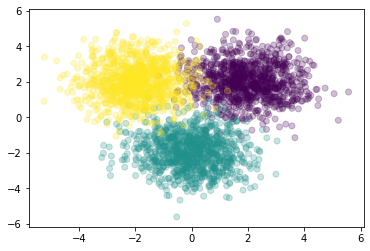

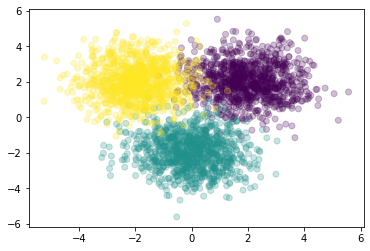

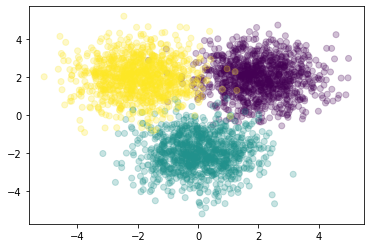

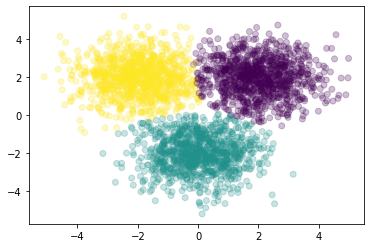

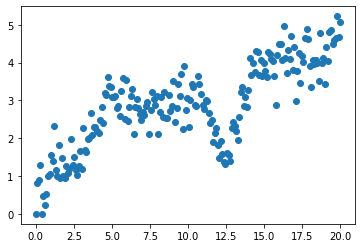

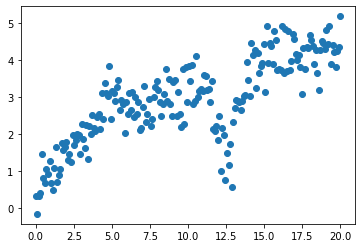

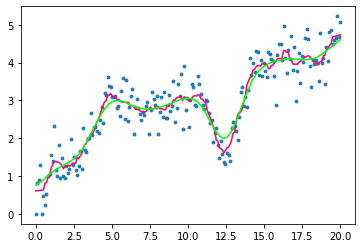

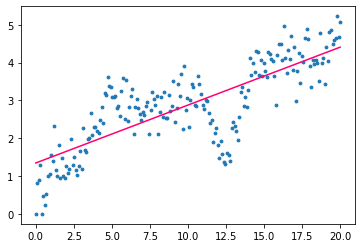

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import math
import numpy as np
import random
from intro_to_Naive_Bayes import GaussBayes, accuracy
from KNN_Classifier import KNNClassifier, accuracy
from Simple_Regression import OURLinearRegression, KNNRegressor,R2,KMeans

random.seed(9001)
#WHAT!? 9000!?!?
df = pd.read_csv (r'C:\Users\Field Employee\Downloads\raw_house_data.csv')

'''Replace all instances of "None" with "0" for the sake of consistency (descrepencies noticed in the garage and HOA columns specifically'''
df = df.replace(['None'],'0')
nan_col=[]
for header in df.head():
    miss=df[header].isnull().values.any()
    if miss==True:
            nan_col.append(header)

'''Locate columns with null values'''

In [2]:
'''Gather the indicies with null values'''
nan_acres=df.loc[df['lot_acres'].isnull()]
nan_mls=nan_acres['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
nan_mls=nan_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(nan_acres)):
    row=nan_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
#print(df.loc[df['MLS'] == 3058213])


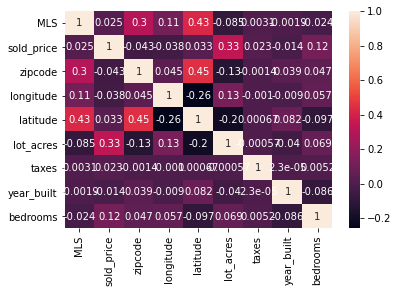

In [3]:
corr=df.corr()
sn.heatmap(corr, annot=True)
plt.show()

In [4]:
miss_col=[]
for header in df.head():
    miss=df.loc[df[header]=='0']
    if miss.empty==False:
            miss_col.append(header)

print(miss_col)

['bathrooms', 'sqrt_ft', 'garage', 'kitchen_features', 'fireplaces', 'floor_covering', 'HOA']


In [5]:
z_lot=df.loc[df['lot_acres']==0]
'''Gather the indicies with 0 values'''
z_mls=z_lot['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
z_mls=z_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(z_lot)):
    row=z_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4955, 16)


In [6]:
z_tax=df.loc[df['taxes']==0]
'''Gather the indicies with 0 values'''
z_mls=z_tax['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
z_mls=z_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(z_tax)):
    row=z_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4934, 16)


In [7]:
z_bath=df.loc[df['bathrooms']=='0']
'''Gather the indicies with 0 values'''
z_mls=z_bath['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
z_mls=z_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(z_bath)):
    row=z_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4928, 16)


In [8]:
z_sq=df.loc[df['sqrt_ft']=='0']
'''Gather the indicies with 0 values'''
z_mls=z_sq['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
z_mls=z_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(z_sq)):
    row=z_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4888, 16)


In [9]:
z_gar=df.loc[df['garage']==0]
print(z_gar.shape)
df["garage"] = pd.to_numeric(df["garage"])
'''left in so that if need be the next team can quickly convert columns to numerics instead of dealing with strings'''

(0, 16)


'left in so that if need be the next team can quickly convert columns to numerics instead of dealing with strings'

In [10]:
ind=df.loc[df['longitude']==-112.520168].index
df=df.drop(index=ind)
'''Drop longitude outlier (108 miles away from nearest house)'''

'Drop longitude outlier (108 miles away from nearest house)'

In [11]:
hoa_col=df['HOA']
hoa_col=hoa_col.sort_values()
i=0
hoa_col=hoa_col.reset_index()
'''Column consists of strings so I collect all of the entries longer than 4 characters'''
h=[]
while(i<len(hoa_col)):
    row=hoa_col.iloc[i]
    hoa=row.get(key=1)
    if len(hoa)>4:
        h.append(row.get(key=1))
    #ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    i+=1 
'''next lowest group of HOA values are in the 1000s'''
ind=df.loc[df['HOA']=='5,900'].index
df=df.drop(index=ind)

<AxesSubplot:xlabel='bedrooms', ylabel='bathrooms'>

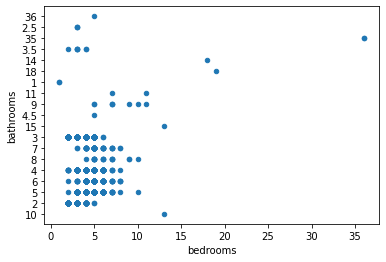

In [12]:
'''scatter for bed & bath'''
df.plot.scatter(x= 'bedrooms', y= 'bathrooms')

In [13]:
'''household has 36 bathrooms and 5 bedrooms'''
ind=df.loc[df['bathrooms']=='35'].index
df=df.drop(index=ind)

In [14]:
x=df.loc[df['bedrooms']==36]
print(x)

Empty DataFrame
Columns: [MLS, sold_price, zipcode, longitude, latitude, lot_acres, taxes, year_built, bedrooms, bathrooms, sqrt_ft, garage, kitchen_features, fireplaces, floor_covering, HOA]
Index: []


(4884, 16)

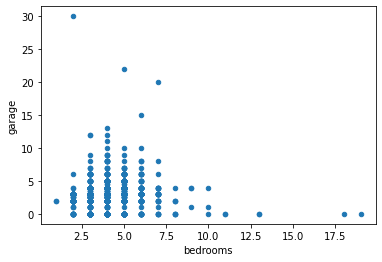

In [15]:
'''scatter for bed & bath'''
df.plot.scatter(x= 'bedrooms', y= 'garage')
df.shape

In [16]:
'''household have bathrooms and 5 bedrooms'''
gar=df.loc[df['garage']>14]
'''Gather the indicies with 0 values'''
gar_mls=gar['MLS']
'''Gathers the MLS (ID KEY) of each of the houses with nan values for lot_acres'''
i=0
gar_mls=gar_mls.reset_index()
'''Reset the indicies of series obj so that I may iterate without actually knowing values'''
while(i<len(gar)):
    row=gar_mls.iloc[i]
    ind=row.get(key=0)
    '''reseting the indicies stores the prior index in the first column of the series'''
    df=df.drop(index=ind)
    i+=1
print(df.shape) 

(4880, 16)


In [17]:
#Drop kitchen_features there is too much variation elec. "stove and electric stove"
df=df.drop(columns='kitchen_features')

In [18]:
fc=df['floor_covering'].unique()
'''Floor covering seems to be composed of a set of options with an aditional option "other" which allows you to write an a cover'''
#add each option to a set to be rid of dups
fc_set=set()
for row in fc:#list of str
    #comma seperated floor coverings
    cov=row
    start_ind=0
    comma_ind=cov.find(',')
    while(comma_ind!=-1):#find returns a -1 if no comma is found
        covering=cov[start_ind:comma_ind]
        fc_set.add(covering)
        start_ind=comma_ind+1
        comma_ind=cov.find(',',start_ind,len(cov)-1)
    fc_set.add(cov[start_ind:])
print(fc_set)

{' Other: Brick inlayed', ' Other: cork', 'Other: Saltillo tile', ' Other: Wood Laminate Water', ' Other: Organic Wool Carpet', ' Other: gray saltillo', ' Mexican Tile', ' Other: Tile bathrooms', ' Other: Bamboo', 'Ceramic Tile', ' Other: Slate tile', ' Other: San Marcos Mex Tile', ' Other: Wood like', ' Other: Red Brick', ' Other: Brick Pavers', 'Other: Recycled Porcelain', 'Other', ' Other: Lux Vinyl', ' Other: Throughout home', ' Other: Canterra Stone', 'Other: Polish concrete', ' Other: brick', ' Other: Porcelain tile', ' Other: UPG Flooring', 'Other: TBD', ' Other: NEW WOOD PLANK TILE', 'Other: Italian Tile', ' Other: acrylic overlay', ' Other: Travertine Tile', 'Concrete', ' Other: Italian Tile', ' Ceramic Tile', 'Other: Porcelain tile', ' Other: Rojo Concrete Overla', ' Other: Cement tiles/Bamboo', ' Other: Porcelain Wood Tile', ' Other: porcelain wood tile', 'Other: None', ' Other: Marble', ' Other: See remarks', ' Other: Talavera Floors', ' Other: Pergo', 'Other: Polished Bric

In [19]:
#checking number of occurance to qualfy which floor covering should be their own column
"""ceramic tile:2469*
concrete:744*
granite:1
indoor/outdoor
laminate:86*#106 w/ wood *cheap iterate laminate first*
mexican tile:646*
natural stone:1472*#1479 as stone + quarzite
carpet:3437*
wood:1220*#conditional for not laminate """
count=0
cv=df['floor_covering']
for row in cv:
    if 'lam' in row.lower() and 'wood' in row.lower():count+=1
print(count)

20


In [20]:
#Ceramic population
cer=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'ceramic' in row.lower():cer.append(1)
    else:cer.append(0)
    i+=1
df['ceramic tile']=cer

In [21]:
#Concrete population
conc=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'conc' in row.lower():conc.append(1)
    else:conc.append(0)
    i+=1
df['concrete']=conc

In [22]:
#Mexican tile population
mex=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'mex' in row.lower():mex.append(1)
    else:mex.append(0)
    i+=1
df['mexican tile']=mex

In [23]:
#Natural stone population
nat=[]
gran=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'stone' in row.lower():nat.append(1)
    else:nat.append(0)
    i+=1
df['natural stone']=nat
#add quartzite as natural stone
quar=df.loc[df['floor_covering']=='Other: Quartzite'].index
df.loc[quar,'natural stone']=1

In [24]:
#Carpet population
carp=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'carp' in row.lower():carp.append(1)
    else:carp.append(0)
    i+=1
df['carpet']=carp

In [25]:
#Laminate population
lam=[]
i=0
cov=df['floor_covering']
for row in cov:
    if 'lam' in row.lower():lam.append(1)
    else:lam.append(0)
    i+=1
df['laminate']=lam

In [26]:
#wood population
wood=[]
i=0
cov=df['floor_covering']
for row in cov:
    #avoid double couning "other: laminate wood" and its variations
    if 'wood' in row.lower() and 'lam' not in row.lower():wood.append(1)
    else:wood.append(0)
    i+=1
df['wood']=wood

In [27]:
#other population
other=[]
i=0
double_dip=['ceramic','concrete','mex','stone','carpet','lam', 'wood']
cov=df['floor_covering']
for row in cov:
    #avoid double counting "other: laminate wood" and its variations
    repeat=False
    #If any of the coverings with their own columns are detected break the double_dip loop and append a 0 to avoid double count
    for double in double_dip:
        if double in row.lower():
            repeat=True
            break
    if repeat==False:other.append(1)
    else:other.append(0)
    i+=1
df['other']=other
#other column  is binary
'''oth=[]
for row in cov:
    if 'other' in row.lower():oth.append(row)
print(oth)'''

"oth=[]\nfor row in cov:\n    if 'other' in row.lower():oth.append(row)\nprint(oth)"

In [28]:
'''#Trimming top & bottom 5%
df["sqrt_ft"] = pd.to_numeric(df["sqrt_ft"])

sq=df['sqrt_ft']
sort=sorted(sq)
t5=math.floor(len(sq)*.95)
b5=math.floor(len(sq)*.05)
top=sort[t5:]
bottom=sort[:b5+1]
fat=[]
for i in bottom:
    fat.append(i)
for i in top:
    fat.append(i)
for i in fat:
    ind=df[df['sqrt_ft'] == i].index.values
    df=df.drop(ind)'''

'#Trimming top & bottom 5%\ndf["sqrt_ft"] = pd.to_numeric(df["sqrt_ft"])\n\nsq=df[\'sqrt_ft\']\nsort=sorted(sq)\nt5=math.floor(len(sq)*.95)\nb5=math.floor(len(sq)*.05)\ntop=sort[t5:]\nbottom=sort[:b5+1]\nfat=[]\nfor i in bottom:\n    fat.append(i)\nfor i in top:\n    fat.append(i)\nfor i in fat:\n    ind=df[df[\'sqrt_ft\'] == i].index.values\n    df=df.drop(ind)'

In [29]:
sq=df['sqrt_ft']
sort=sorted(sq)
#sq.iat[math.floor(len(sq)**.25)-1]
q1=math.floor(len(sq)*.25)
q2=math.floor(len(sq)*.5)
q3=math.floor(len(sq)*.75)
sq_bucket=[]
for row in sq:
    if row<=sort[q1]:sq_bucket.append(.25)
    elif row<=sort[q2]:sq_bucket.append(.5)
    elif row<=sort[q3]:sq_bucket.append(.75)
    else:sq_bucket.append(1)
df['sqrt_ft_quart']=sq_bucket
#sq.describe()
#print(sq.iat[1219])
print(len(sq))
print(q1)
print(q2)
print(q3)
print(sort[q1])
print(sort[q2])
print(sort[q3])

4880
1220
2440
3660
3047
3514
4127


In [30]:
'''df["sqrt_ft"] = pd.to_numeric(df["sqrt_ft"])
qsq=df['sqrt_ft']
qsq=sq.to_numpy()
q=4.0
i=0
qlabel=[]ss
while i<=1:
    qlabel.append(i)
    i+=1/q
#print(qlabel)
pd.qcut(qsq,q=4)'''

'df["sqrt_ft"] = pd.to_numeric(df["sqrt_ft"])\nqsq=df[\'sqrt_ft\']\nqsq=sq.to_numpy()\nq=4.0\ni=0\nqlabel=[]ss\nwhile i<=1:\n    qlabel.append(i)\n    i+=1/q\n#print(qlabel)\npd.qcut(qsq,q=4)'

In [80]:
df["sqrt_ft"] = pd.to_numeric(df["sqrt_ft"])
sqd=df['sqrt_ft']
psf=df['sold_price']
i=0
price_sq=[]
while i<len(sqd):
    ppsf=psf.iloc[i]/sqd.iloc[i]
    price_sq.append(ppsf)
    i+=1
df['price_per_sqft']=np.log(price_sq)
df["sqrt_ft"]=np.log(df["sqrt_ft"])

In [32]:
#Trimming top & bottom 5%
df["price_per_sqft"] = pd.to_numeric(df["price_per_sqft"])

sq=df['price_per_sqft']
sort=sorted(sq)
t5=math.floor(len(sq)*.95)
b5=math.floor(len(sq)*.05)
top=sort[t5:]
bottom=sort[:b5+1]
fat=[]
for i in bottom:
    fat.append(i)
for i in top:
    fat.append(i)
for i in fat:
    ind=df[df['price_per_sqft'] == i].index.values
    df=df.drop(ind)

In [33]:
#Combine long & lat
'''NORMALIZE LONG & LAT FIRST then drop columns'''
lat=df['latitude']
long=df['longitude']
x_long=np.cos(long)
x_lat=np.cos(lat)
df['x']=x_long*x_lat
df['x'].describe()

count    4391.000000
mean       -0.354648
std         0.095271
min        -0.997196
25%        -0.394927
50%        -0.358149
75%        -0.282237
max         0.940668
Name: x, dtype: float64

In [34]:
#Combine long & lat
lat=df['latitude']
long=df['longitude']
y_long=np.sin(long)
y_lat=np.sin(lat)
df['y']=y_long*y_lat
df['y'].describe()

count    4391.000000
mean        0.632057
std         0.108520
min        -0.119410
25%         0.601583
50%         0.638683
75%         0.708422
max         0.924610
Name: y, dtype: float64

In [35]:
k=KMeans(K=5)
k.fit(df[['latitude', 'longitude']].to_numpy())
bestCat=k.predict(df[['latitude', 'longitude']].to_numpy())
df['gps_bin']=bestCat

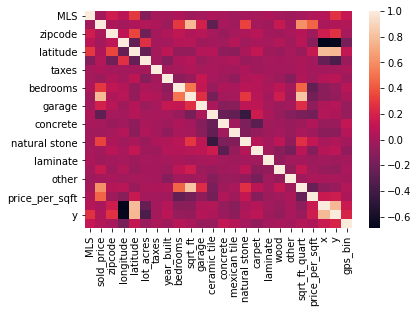

In [36]:
corr=df.corr()
sn.heatmap(corr)
plt.show()

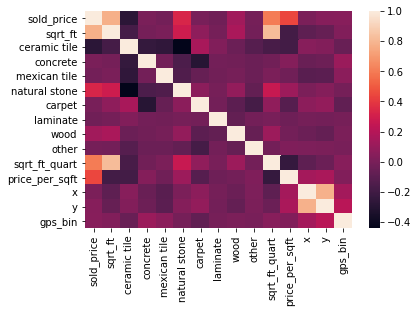

In [37]:
copy=df.copy()
drop=['MLS','zipcode','longitude','latitude','lot_acres','taxes','year_built','bedrooms','garage']
copy=copy.drop(columns=drop)
corr=copy.corr()
sn.heatmap(corr)
plt.show()

<AxesSubplot:xlabel='sqrt_ft_quart', ylabel='sold_price'>

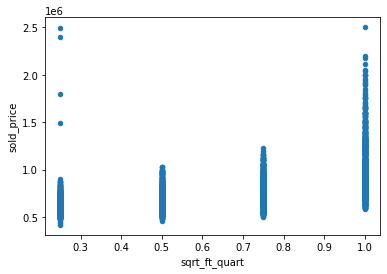

In [38]:
'''scatter for sqrft & sold price'''
df.plot.scatter(x= 'sqrt_ft_quart', y= 'sold_price')

<AxesSubplot:xlabel='sqrt_ft', ylabel='sold_price'>

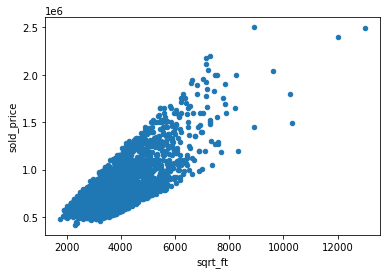

In [39]:
'''scatter for sqrft & sold price'''
df.plot.scatter(x= 'sqrt_ft', y= 'sold_price')

<AxesSubplot:xlabel='x', ylabel='y'>

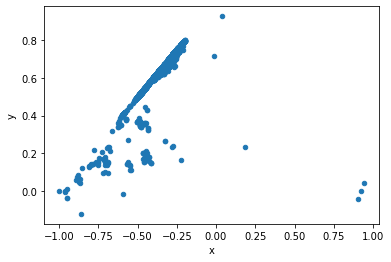

In [40]:
'''scatter for sqrft & sold price'''
df.plot.scatter(x= 'x', y= 'y')

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

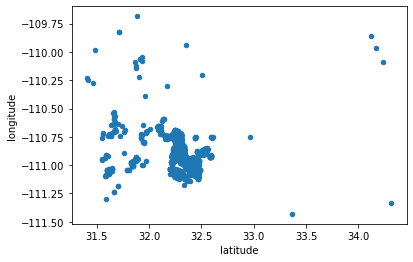

In [41]:
'''scatter for sqrft & sold price'''
df.plot.scatter(x= 'latitude', y= 'longitude')

(array([122., 189., 243., 305., 382., 358., 359., 410., 382., 347., 257.,
        225., 186., 167., 110.,  93.,  94.,  72.,  53.,  37.]),
 array([139.34606101, 147.70442845, 156.0627959 , 164.42116335,
        172.7795308 , 181.13789824, 189.49626569, 197.85463314,
        206.21300059, 214.57136804, 222.92973548, 231.28810293,
        239.64647038, 248.00483783, 256.36320527, 264.72157272,
        273.07994017, 281.43830762, 289.79667507, 298.15504251,
        306.51340996]),
 <BarContainer object of 20 artists>)

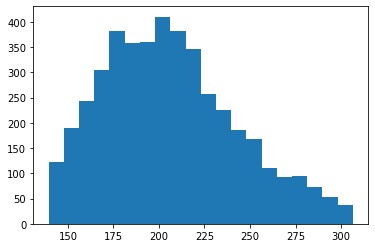

In [42]:
plt.hist((df['sold_price']/df['sqrt_ft']),20)

In [43]:
'''Creating bins for ppsft'''
ppsf=df['price_per_sqft']
start=120
step=10
ppsft_bin=[]
for row in ppsf:
    i=0
    box=start+(step*i)
    while row>box:
        i+=1
        box=start+(step*i)
    ppsft_bin.append(i)
df['ppsqft_bin']=ppsft_bin

In [148]:
val_ind=math.floor(len(df)*.9)
#Xset=['x','y','ceramic tile','concrete','mexican tile','natural stone','carpet','laminate','wood','other','price_per_sqft']
Xset=['price_per_sqft','x','y','sqrt_ft','sqrt_ft_quart']
cleaned=df[Xset]
Yset=np.log(df['sold_price'])
train_ind=math.floor(len(cleaned)*.8)
train_X=cleaned.iloc[:train_ind,:]
train_X=train_X.to_numpy()
train_y=Yset.iloc[:train_ind]
train_y=train_y.to_numpy()
val_X=cleaned.iloc[train_ind:val_ind,:]
val_X=val_X.to_numpy()
val_y=Yset.iloc[train_ind:val_ind]
val_y=val_y.to_numpy()
test_X=cleaned.iloc[val_ind:,:]
test_X=test_X.to_numpy()
test_y=Yset.iloc[val_ind:]
test_y=test_y.to_numpy()

0.44146903989418984

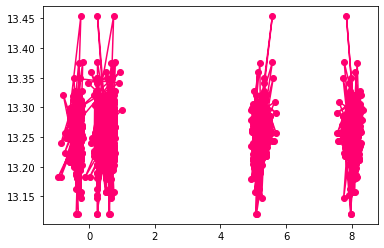

In [149]:
knn=KNNRegressor()
knn.fit(train_X,train_y)
y_hat=knn.predict(val_X,2,epsilon=1e-3)
plt.figure()
#plt.scatter(val_X,y_hat,s=8)
plt.plot(val_X,y_hat,color='#FF0070', marker ='o')
#print(y_hat)
R2(val_y,y_hat)

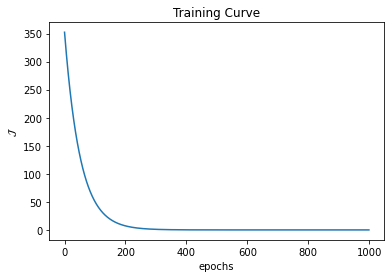

In [150]:
olr=OURLinearRegression()
olr.fit(train_X,train_y,epochs=1e3,eta=1e-4,show_curve=True)

In [151]:
y_hat=olr.predict(val_X)
R2(val_y,y_hat)

-30.371546851544494

In [ ]:
val_ind=math.floor(len(df)*.9)
Y_labels=['ppsqft_bin']
X_labels=['latitude','longitude']
features=df[X_labels]
Yset=df[Y_labels]
print(features.shape)
print(Yset.shape)
train_ind=math.floor(len(features)*.8)
train_X=features.iloc[:train_ind,:]
train_X=train_X.to_numpy()
train_y=Yset.iloc[:train_ind]
train_y=train_y.to_numpy()
val_X=features.iloc[train_ind:val_ind,:]
val_X=val_X.to_numpy()
val_y=Yset.iloc[train_ind:val_ind]
val_y=val_y.to_numpy()
test_X=features.iloc[val_ind:,:]
test_X=test_X.to_numpy()
test_y=Yset.iloc[val_ind:]
test_y=test_y.to_numpy()
print(train_y)

In [ ]:
plt.figure()
plt.scatter(train_X[:,0],train_X[:,1])

In [ ]:
knn=KNNClassifier()
knn.fit(train_X,y2)
y_hat=knn.predict(val_X,3)
print(accuracy(y_hat,val_y))

In [ ]:
knn.fit(X3,y2)

In [ ]:
train_X.shape

In [ ]:
train_X[1]

In [ ]:
y_hat= knn.predict(X3,3)

In [ ]:
plt.figure()
plt.scatter(X3[:,1],X3[:,0],c=y_hat)

In [ ]:
print(accuracy(y_hat,y2))

In [ ]:
y_hat